In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import win32com.client
import os
import json

from polytec_read_svd import *
from scipy import signal, interpolate

In [2]:

def save_dict2json(data, out_filename):

    
    with open(out_filename, "w") as outfile:
        json.dump(data, outfile,  cls=NumpyArrayEncoder, indent=4)
    print("Saved to", out_filename)
        

In [3]:
from scipy.signal import savgol_filter
# yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


def smooth2(y, box_pts, order=3):
    box = np.ones(box_pts)/box_pts
    y_smooth = savgol_filter(y, box_pts, order)
    return y_smooth

In [4]:
root_path = "C:\\Users\\diogo\\INL\\Sensible_Car - Documents\\P01_uMirror\\Characterization\\2021-08-26 - Mirror Slow Fast axis vacuum characterization\\processed"

# root_path = "\\\\inl-fps01\\Data\\CleanRoom\\UsersData\\29_ImiNa\\Shares with Diogo Aguiam\\Polytec\\2021-08-26 - Mirror Slow Fast axis vacuum characterization"

root_path = "C:\\Users\\diogo\\INL\\Sensible_Car - Documents\\P01_uMirror\\Characterization\\2021-10-19 - Mirror Slow Axis TEST08"


files = os.listdir(root_path)

json_files = [f for f in files if ".json" in os.path.splitext(f)[1]]

fast_axis_files = [f for f in json_files if "_FA_03_" in f]
slow_axis_files = [f for f in json_files if "_SA_01_" in f]


print(fast_axis_files)
print(slow_axis_files)




[]
[]


C:\Users\diogo\INL\Sensible_Car - Documents\P01_uMirror\Characterization\2021-08-26 - Mirror Slow Fast axis vacuum characterization\processed\Device A_W11L600_1_SA_01_left.svd.json
0 1.2708842677110348e-06
1 6.682763291921969e-07
2 5.115548640411036e-06
3 8.100050403822157e-07
4 3.6973523160958297e-07
5 4.987490043275132e-07
6 2.0755858827497786e-06
7 1.5000681426011326e-06
8 8.74432522627247e-07
9 6.824092959496272e-07
10 1.0069885584673208e-06
11 1.0808864835374097e-06
12 1.7035713164908783e-06
13 7.465683452226048e-07
14 1.2577506535111366e-06


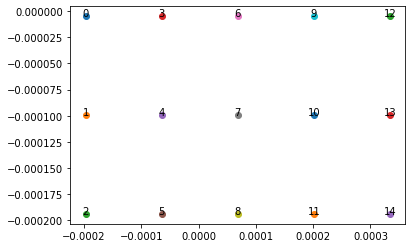

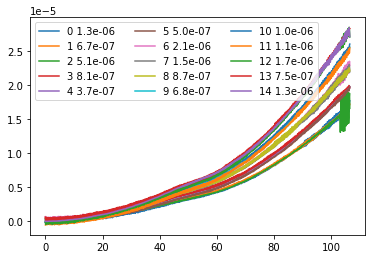

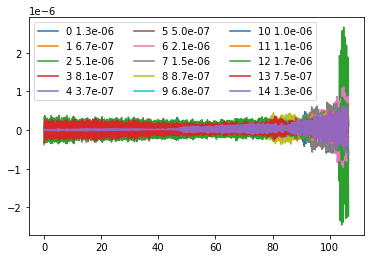

In [100]:

for json_file in slow_axis_files[:1]:
#             print(file)
    filename = os.path.join(root_path, json_file)
    print(filename)



    with open(filename) as json_file:
        data = json.load(json_file)
        nr_points = len(data.keys())-3

        
        # Evaluate all data
        for i in range(nr_points):
            index = "%d"%i
            
            
            
            if i >= 15:
                continue

            x,y = data[index]['x'], data[index]['y']
            voltage, displacement = data[index]['voltage'], data[index]['displacement']
            displacement = np.nan_to_num(displacement)
            
            # Evaluation metric
            displacement_gradient = np.gradient(displacement)
            metric = np.percentile(displacement_gradient, 95)
            
            metric = np.ptp(displacement_gradient)
            print(index, metric)
            
            
            plt.figure("Point_location")

            plt.scatter(x,y)
            plt.annotate("%d"%(i),  (x,y), ha='center')
            
            
            plt.figure("voltage-displacement")
            
            plt.plot(voltage, displacement, label="%d %0.1e"%(i, metric))
            plt.legend(ncol=3)
            
            plt.figure("metric")
            
            plt.plot(voltage, displacement_gradient, label="%d %0.1e"%(i, metric))
            plt.legend(ncol=3)
#         plt.title(dat)

In [101]:
displacement[np.isnan(displacement)] = 0

C:\Users\diogo\INL\Sensible_Car - Documents\P01_uMirror\Characterization\2021-08-26 - Mirror Slow Fast axis vacuum characterization\processed\Device A_W11L600_1_SA_01_right.svd.json
0 3.0447351072145126e-07
1 2.438866603932774e-06
2 7.635119886028707e-07
3 2.1663628262514906e-06
4 5.608252554427351e-06
5 4.275463659521047e-06
6 2.785050004661056e-06
7 6.080832298004165e-07
8 2.9118224313167628e-06
9 4.578871356421725e-06
10 8.56635901287842e-06
11 5.973722891876601e-06
12 9.228931911138109e-06
13 7.98890849589582e-07
14 6.2061716710657546e-06


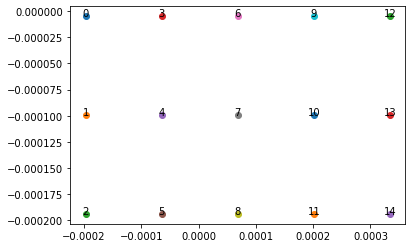

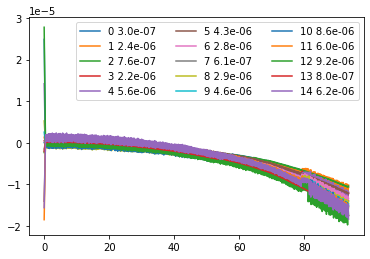

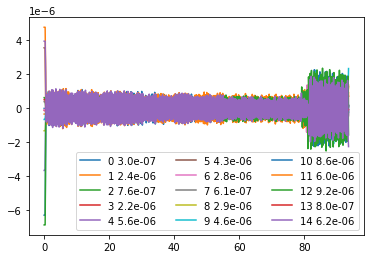

In [102]:

for json_file in slow_axis_files[1:2]:
#             print(file)
    filename = os.path.join(root_path, json_file)
    print(filename)



    with open(filename) as json_file:
        data = json.load(json_file)
        nr_points = len(data.keys())-3
        
        data['metric'] = []
        
        # Evaluate all data
        for i in range(nr_points):
            index = "%d"%i
            
            
            
            if i >= 15:
                continue

            x,y = data[index]['x'], data[index]['y']
            voltage, displacement = data[index]['voltage'], data[index]['displacement']
            
            displacement = np.nan_to_num(displacement)
            # Evaluation metric
            displacement_gradient = np.gradient(displacement)
            metric = np.percentile(displacement_gradient, 5)
            
            metric = np.ptp(displacement_gradient)
            print(index, metric)
            data['metric'].append(metric)
            
            
            plt.figure("Point_location")

            plt.scatter(x,y)
            plt.annotate("%d"%(i),  (x,y), ha='center')
            
            
            plt.figure("voltage-displacement")
            
            plt.plot(voltage, displacement, label="%d %0.1e"%(i, metric))
            plt.legend(ncol=3)
            
            plt.figure("metric")
            
            plt.plot(voltage, displacement_gradient, label="%d %0.1e"%(i, metric))
            plt.legend(ncol=3)
#         plt.title(dat)

In [103]:
from scipy import stats




In [104]:
def range_averaging(x, y, N):
    
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-104-eadbe287b1d4>, line 4)

### Slow Axis


C:\Users\diogo\INL\Sensible_Car - Documents\P01_uMirror\Characterization\2021-08-26 - Mirror Slow Fast axis vacuum characterization\processed\Device A_W11L600_1_SA_01_left.svd.json
[False  True  True False  True  True False  True False  True False False
 False False  True]
C:\Users\diogo\INL\Sensible_Car - Documents\P01_uMirror\Characterization\2021-08-26 - Mirror Slow Fast axis vacuum characterization\processed\Device A_W11L600_1_SA_01_right.svd.json
[ True  True  True  True False False False  True False  True False False
 False  True False]
C:\Users\diogo\INL\Sensible_Car - Documents\P01_uMirror\Characterization\2021-08-26 - Mirror Slow Fast axis vacuum characterization\processed\Device A_W11L900_1_SA_01_left.svd.json
[ True False  True False  True  True False  True False  True False False
 False  True False]
C:\Users\diogo\INL\Sensible_Car - Documents\P01_uMirror\Characterization\2021-08-26 - Mirror Slow Fast axis vacuum characterization\processed\Device A_W11L900_1_SA_01_right.svd.

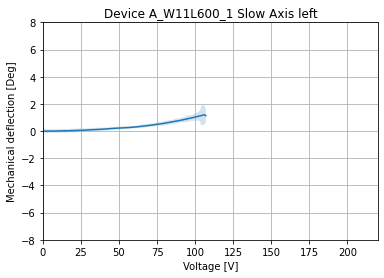

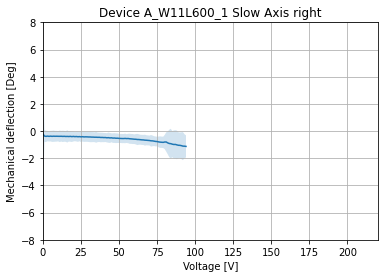

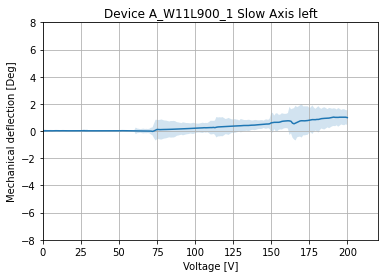

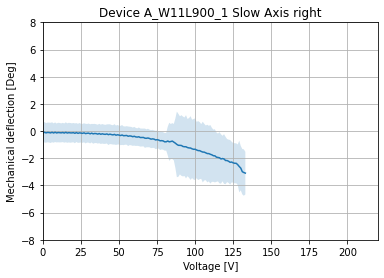

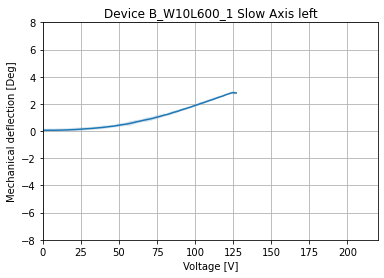

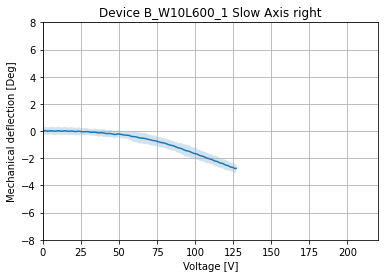

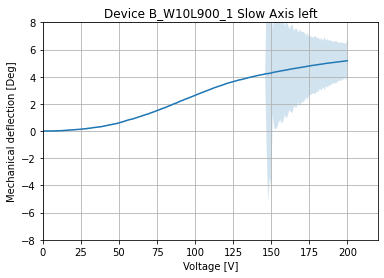

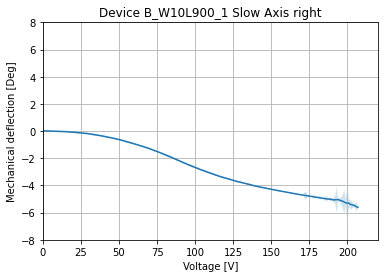

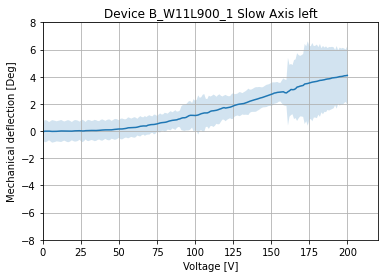

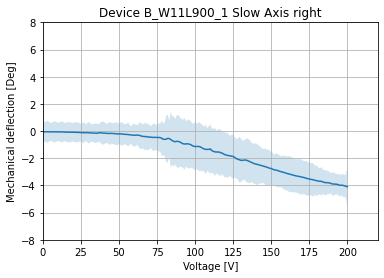

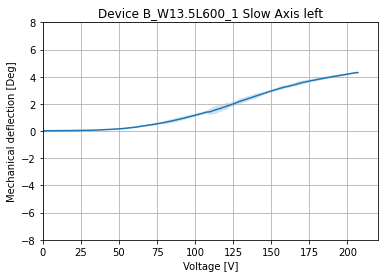

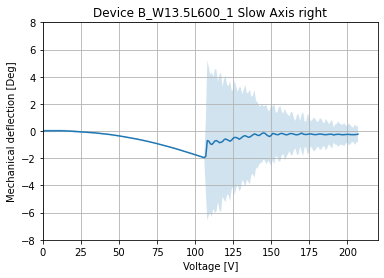

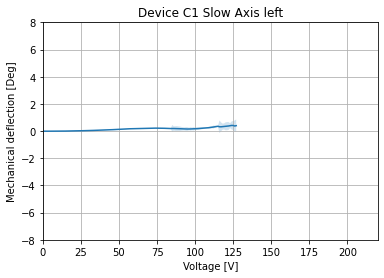

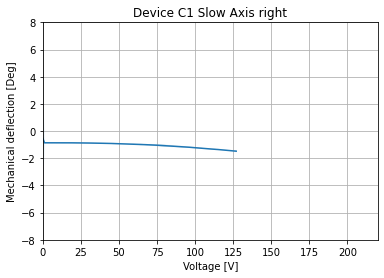

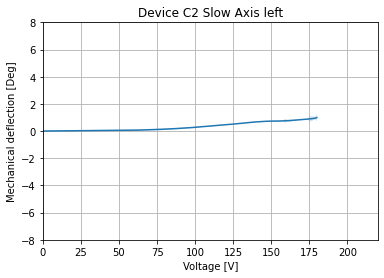

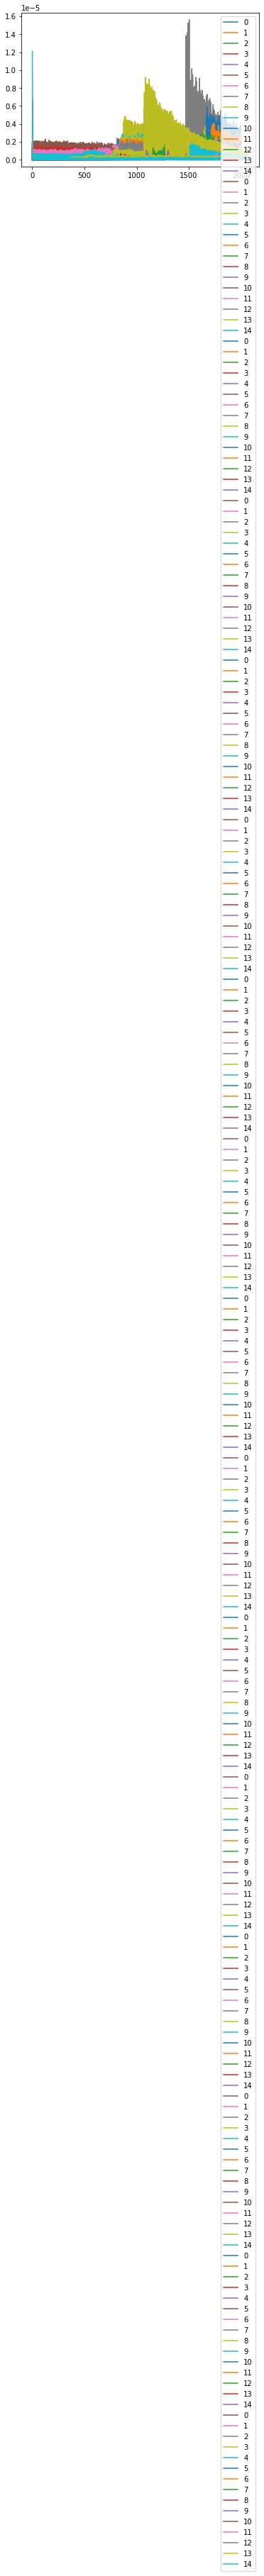

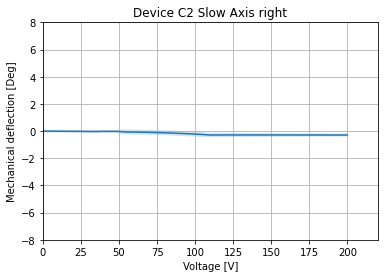

In [108]:
smooth_N = 21
dosmooth = True
dosmooth = False

index_range = 15
metric_flag_percentile = 50


for json_file in slow_axis_files[:]:
#             print(file)
    filename = os.path.join(root_path, json_file)
    print(filename)



    with open(filename) as json_file:
        data = json.load(json_file)
        nr_points = len(data.keys())-3

        data['metric'] = []
        
        data['theta_x_array'] = []

        # First evaluate all metrics
        for i in range(index_range):
            index = "%d"%i

            voltage, displacement = data[index]['voltage'], data[index]['displacement']
#             displacement = np.nan_to_num(displacement)
            # Evaluation metric
            displacement_gradient = np.gradient(displacement)
            displacement_gradient = np.abs(displacement_gradient)

            metric = np.percentile(displacement_gradient, 50)
            
#             metric = np.ptp(displacement_gradient)
#             print(index, metric)
            data['metric'].append(metric)
    
            plt.figure("metric")
            plt.plot(displacement_gradient, label=i)
            plt.legend()

        
            
#         data['metric_flag'] = []
#         print(data['metric'])
#         plt.figure("metric")
#         plt.plot(data['metric'])
        
        
        m = data['metric']
        data['metric_flag'] = m<np.percentile(m, metric_flag_percentile)
        
        print(data['metric_flag'])
        # Evaluate all data
        for i in range(index_range):
            index = "%d"%i
            
#             if not data['metric_flag'][i]:
#                 continue
            
            x1,y1 = data[index]['x'], data[index]['y']
            voltage1, displacement1 = data[index]['voltage'], data[index]['displacement']
            displacement1 = np.nan_to_num(displacement1)

            voltage1 = np.array(voltage1)
            displacement1 = np.array(displacement1)
            
#             plt.figure('displacement')
#             plt.plot(voltage1, displacement1, label=i)
#             plt.legend()
            
            if dosmooth:
                displacement1 = smooth2(displacement1, smooth_N)
            
            for j in range(i, 15):
                index_j = "%d"%j
#                 if not data['metric_flag'][j]:
#                     continue
            
                x2,y2 = data[index_j]['x'], data[index_j]['y']
                voltage2, displacement2 = data[index_j]['voltage'], data[index_j]['displacement']
                displacement2 = np.nan_to_num(displacement2)

                
                voltage2 = np.array(voltage2)
                displacement2 = np.array(displacement2)
                
                if dosmooth:
                    displacement2 = smooth2(displacement2, smooth_N)

                delta_x = x2-x1
                delta_y = y2-y1

                delta_z = displacement2 - displacement1
                
                # normalize delta
                delta_z -= delta_z[0]
#                 delta_z -= np.min(delta_z)

                theta_x = np.zeros(len(voltage1))
                theta_y = np.zeros(len(voltage1))
                
                if delta_x == 0:
                    continue
                if delta_y != 0:
                    continue
                
                if delta_x != 0:
                    theta_x = np.arctan(delta_z/delta_x)
                if delta_y != 0:
                    theta_y = np.arctan(delta_z/delta_y)
                
                theta_x = np.degrees(theta_x)
                theta_y = np.degrees(theta_y)
                
                
                data['theta_x_array'].append(theta_x)
            
        voltage = voltage1

        theta_x_array = np.array(data['theta_x_array'])
        theta_x_mean = np.mean(theta_x_array,0)
        theta_x_std = np.std(theta_x_array,0)
        
        
        voltage_resolution = 1
        voltage_range = 400

        voltage_bins = np.arange(-voltage_resolution/2,voltage_range,voltage_resolution)
        stat_voltage = np.arange(0, voltage_range, voltage_resolution)
        stat_mean = stats.binned_statistic(voltage, theta_x_array, 'mean', bins=voltage_bins).statistic
        stat_std = stats.binned_statistic(voltage, theta_x_array, 'std', bins=voltage_bins).statistic

        
        stat_mean = np.mean(stat_mean, 0)
        stat_std = np.max(stat_std, 0)
        
        valid_idx = np.invert(np.isnan(stat_mean))
        
        stat_voltage = stat_voltage[valid_idx]
        stat_mean = stat_mean[valid_idx]
        stat_std = stat_std[valid_idx]
        
        data['stat_voltage'] = stat_voltage
        data['stat_mean'] = stat_mean
        data['stat_std'] = stat_std
        
        plt.figure()
        
        
        plt.plot(stat_voltage, stat_mean)
        plt.fill_between(stat_voltage, stat_mean-stat_std, stat_mean+stat_std , alpha=0.2)

        plt.xlabel("Voltage [V]")
        
        plt.ylabel("Mechanical deflection [Deg]")
        
        title = "%s %s %s"%(data['device'], data['axis'], data['side'])
        
        plt.xlim(0,220)
        plt.ylim(-8,8)
        plt.title(title)
        
        out_filename = filename+".png"
        out_filename = os.path.join(root_path, out_filename)

        
        plt.grid(b=True, which='major', linestyle='-')
        plt.grid(b=True, which='minor', linestyle='-', lw=0.5, alpha=0.4)
        
        
        plt.savefig(out_filename)
        
        out_filename = filename+".csv"
        fmt = "%0.2e"
        np.savetxt(out_filename, np.array([stat_voltage, stat_mean, stat_std]).T,fmt=fmt, delimiter=",", header=' Voltage [V], Angle [Deg], Std Error [Deg]')
            

#                 print(theta_x[0])

            
            
#             plt.figure("Point_location")

#             plt.scatter(x,y)
#             plt.annotate("%d"%(i),  (x,y), ha='center')
            
            
#             plt.figure("voltage-displacement")
            
#             plt.plot(voltage, displacement, label="%d %0.1e"%(i, metric))
#             plt.legend(ncol=3)
            
#             plt.figure("metric")
            
#             plt.plot(voltage, displacement_gradient, label="%d %0.1e"%(i, metric))
#             plt.legend(ncol=3)
            
        
        
#         plt.title(dat)

# fast axis

C:\Users\diogo\INL\Sensible_Car - Documents\P01_uMirror\Characterization\2021-08-26 - Mirror Slow Fast axis vacuum characterization\processed\Device A_W11L600_1_FA_03_Scan_001.svd.json
820 [820, 820, 820, 822, 820, 820, 820, 820, 820, 820, 820, 820, 820, 820, 820]
Metric [3.0074734240766003e-06, 1.3660927321427524e-06, 3.2305123672839164e-07, 1.3511162251234055e-06, 1.7122365534305573e-06, 3.2661191653460264e-06, 9.444882446464371e-07, 3.094319254162096e-07, 2.269865944981575e-06, 3.082794137298844e-06, 3.1409011836045202e-06, 1.2798563004078314e-06, 3.573950380086899e-07, 8.598134310873256e-07, 1.4566860760398866e-06]
[False False  True  True False False  True  True False False False  True
  True  True False]
C:\Users\diogo\INL\Sensible_Car - Documents\P01_uMirror\Characterization\2021-08-26 - Mirror Slow Fast axis vacuum characterization\processed\Device A_W11L600_1_FA_03_Scan_001.svd.json.csv
C:\Users\diogo\INL\Sensible_Car - Documents\P01_uMirror\Characterization\2021-08-26 - Mirro

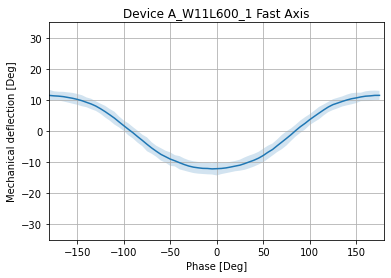

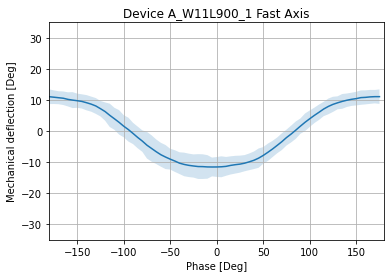

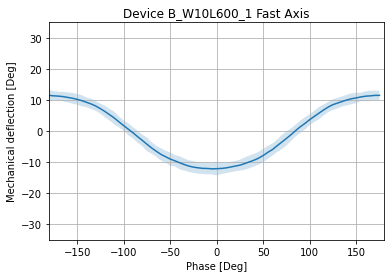

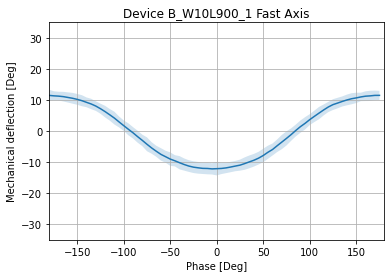

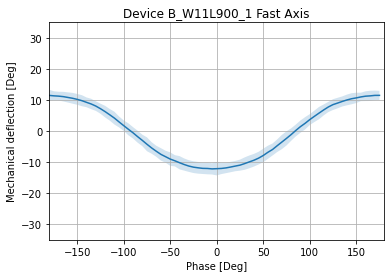

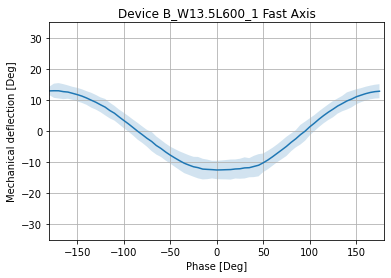

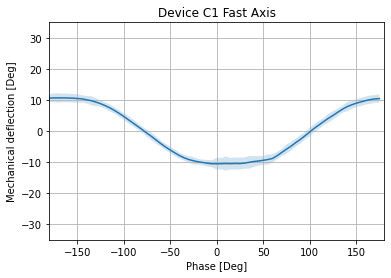

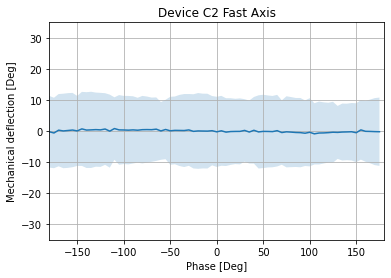

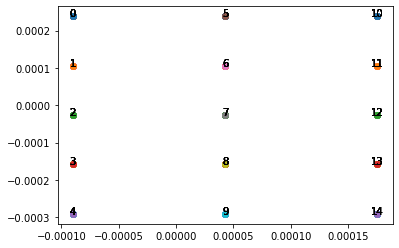

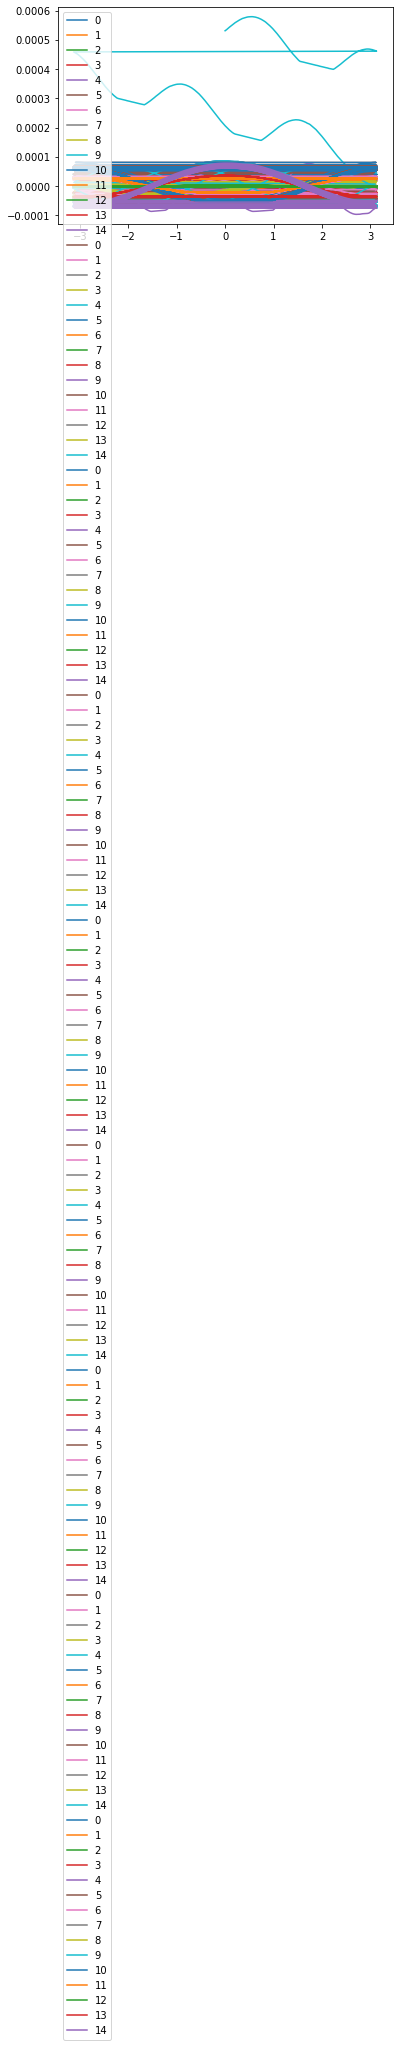

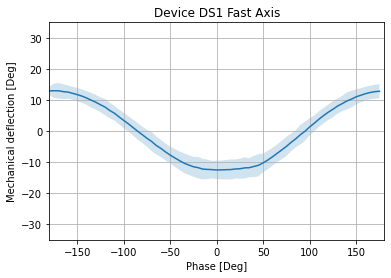

In [89]:
smooth_N = 21
dosmooth = True
dosmooth = False

index_range = 15
metric_flag_percentile = 50

dotruncate = True


for json_file in fast_axis_files[:]:
#             print(file)
    filename = os.path.join(root_path, json_file)
    print(filename)



    with open(filename) as json_file:
        data = json.load(json_file)
        nr_points = len(data.keys())-3

        data['metric'] = []
        
        data['theta_x_array'] = []
        data['theta_y_array'] = []
        
        sample_lengths = []

        # First evaluate all metrics
        for i in range(index_range):
            index = "%d"%i

            phase, displacement = data[index]['phase'], data[index]['displacement']
            x,y =  data[index]['x'], data[index]['y']
#             displacement = np.nan_to_num(displacement)
            # Evaluation metric
            displacement_gradient = np.gradient(displacement)
            displacement_gradient = np.abs(displacement_gradient)

            metric = np.percentile(displacement_gradient, 50)
            
#             metric = np.ptp(displacement_gradient)
#             print(index, metric)
            data['metric'].append(metric)
            sample_lengths.append(len(phase))
    
#             plt.figure("metric")
#             plt.plot(displacement_gradient, label=i)
#             plt.legend()

        
            plt.figure("Point_location")

            plt.scatter(x,y)
            plt.annotate("%d"%(i),  (x,y), ha='center')
            
#         data['metric_flag'] = []
#         print(data['metric'])
#         plt.figure("metric")
#         plt.plot(data['metric'])
        
        truncate_samples_N = np.min(sample_lengths)
        
        print(truncate_samples_N,sample_lengths )
#         break
        m = data['metric']
        data['metric_flag'] = m<np.percentile(m, metric_flag_percentile)
        print("Metric", data['metric'])
        print(data['metric_flag'])
        # Evaluate all data
        for i in range(0, index_range):
            index = "%d"%i
            
#             if not data['metric_flag'][i]:
#                 continue
            
            x1,y1 = data[index]['x'], data[index]['y']
            phase1, displacement1 = data[index]['phase'], data[index]['displacement']
            displacement1 = np.nan_to_num(displacement1)

            phase1 = np.array(phase1)
            displacement1 = np.array(displacement1)
            
            # truncates data to the minimum size of all sample lengths to compare
            if dotruncate:
                phase1 = phase1[:truncate_samples_N]
                displacement1 = displacement1[:truncate_samples_N]
            
            plt.figure("metric")
            plt.plot(phase1, displacement1, label=i)
            plt.legend()

#             plt.figure('displacement')
#             plt.plot(voltage1, displacement1, label=i)
#             plt.legend()
            
            if dosmooth:
                displacement1 = smooth2(displacement1, smooth_N)
            
            for j in range(i, index_range):
#                   if j> i + 5
                index_j = "%d"%j
                if not data['metric_flag'][j]:
                    continue
            
                x2,y2 = data[index_j]['x'], data[index_j]['y']
                phase2, displacement2 = data[index_j]['phase'], data[index_j]['displacement']
                displacement2 = np.nan_to_num(displacement2)

                
                phase2 = np.array(phase2)
                displacement2 = np.array(displacement2)
 

                if dotruncate:
                    phase2 = phase2[:truncate_samples_N]
                    displacement2 = displacement2[:truncate_samples_N]
       
                if dosmooth:
                    displacement2 = smooth2(displacement2, smooth_N)

                delta_x = x2-x1
                delta_y = y2-y1

                delta_z = displacement2 - displacement1
                
                # normalize delta
                delta_z -= delta_z[0]
#                 delta_z -= np.min(delta_z)

                theta_x = np.zeros(len(displacement1))
                theta_y = np.zeros(len(displacement1))
                
                if delta_x != 0:
                    continue
                if delta_y == 0:
                    continue
                
                if delta_x != 0:
                    theta_x = np.arctan(delta_z/delta_x)
                if delta_y != 0:
                    theta_y = np.arctan(delta_z/delta_y)
                
                theta_x = np.degrees(theta_x)
                theta_y = np.degrees(theta_y)
#                 print(i,j, delta_x,theta_x.max(), delta_y, theta_y.max())
#                 print(x1,x2, y1,y2)
                
                
                data['theta_x_array'].append(theta_x)
                data['theta_y_array'].append(theta_y)
            
        phase = phase1
        
#         phase = np.unwrap(phase)
        phase = np.arctan2(np.sin(phase), np.cos(phase))
    

        theta_x_array = np.array(data['theta_x_array'])
        theta_x_mean = np.mean(theta_x_array,0)
        theta_x_std = np.std(theta_x_array,0)
        
        theta_y_array = np.array(data['theta_y_array'])
        theta_y_mean = np.mean(theta_y_array,0)
        theta_y_std = np.std(theta_y_array,0)
        
        
        phase_resolution = 2*np.pi/10
        phase_range = 2*np.pi
        
        
        # Normalize to around 0
#         theta_x_array -= np.mean(theta_x_array)
#         theta_y_array -= np.mean(theta_y_array)
        
        if 1:
            phase_resolution = 5
            phase_range = 360
            phase = np.degrees(phase)

        phase_bins = np.arange(-phase_resolution/2-phase_range/2, phase_range/2, phase_resolution)
        stat_phase = np.arange(-phase_range/2, phase_range/2, phase_resolution)
        # theta_x
        stat_mean = stats.binned_statistic(phase, theta_x_array, 'mean', bins=phase_bins).statistic
        stat_std = stats.binned_statistic(phase, theta_x_array, 'std', bins=phase_bins).statistic
        # theta_y
        stat_mean = stats.binned_statistic(phase, theta_y_array, 'mean', bins=phase_bins).statistic
        stat_std = stats.binned_statistic(phase, theta_y_array, 'std', bins=phase_bins).statistic

        
#         print(stat_std)
        
        stat_mean = np.mean(stat_mean, 0)
        stat_std = np.max(stat_std, 0)
#         print(stat_std)

        valid_idx = np.invert(np.isnan(stat_mean))
        
        stat_phase = stat_phase[valid_idx]
        stat_mean = stat_mean[valid_idx]
        stat_std = stat_std[valid_idx]
        
        stat_mean -= stat_mean.mean()
        
        data['stat_voltage'] = stat_voltage
        data['stat_mean'] = stat_mean
        data['stat_std'] = stat_std
        
#         plt.figure("all")
        
#         for t in theta_y_array:
#             plt.plot(phase, t)

        
        plt.figure()
        
        
        plt.plot(stat_phase, stat_mean)
        plt.fill_between(stat_phase, stat_mean-stat_std, stat_mean+stat_std , alpha=0.2)

        plt.xlabel("Phase [Deg]")
        
        plt.ylabel("Mechanical deflection [Deg]")
        
        title = "%s %s"%(data['device'], data['axis'])
        
        plt.ylim(-35,35)
        plt.xlim(-180,180)
        plt.title(title)
        
        out_filename = filename+".png"
        out_filename = os.path.join(root_path, out_filename)

        
        plt.grid(b=True, which='major', linestyle='-')
        plt.grid(b=True, which='minor', linestyle='-', lw=0.5, alpha=0.4)
        
        
        plt.savefig(out_filename)
        
        out_filename = filename+".csv"
        print(out_filename)
        fmt = "%0.2e"
        np.savetxt(out_filename, np.array([stat_phase, stat_mean, stat_std]).T,fmt=fmt, delimiter=",", header=' Phase [Deg], Angle [Deg], Std Error [Deg]')
            

#                 print(theta_x[0])

            
            
#             plt.figure("Point_location")

#             plt.scatter(x,y)
#             plt.annotate("%d"%(i),  (x,y), ha='center')
            
            
#             plt.figure("voltage-displacement")
            
#             plt.plot(voltage, displacement, label="%d %0.1e"%(i, metric))
#             plt.legend(ncol=3)
            
#             plt.figure("metric")
            
#             plt.plot(voltage, displacement_gradient, label="%d %0.1e"%(i, metric))
#             plt.legend(ncol=3)
            
        
        
#         plt.title(dat)

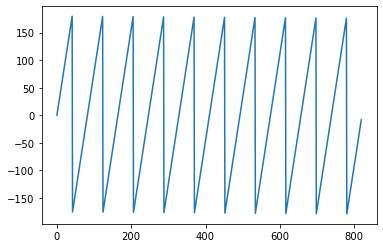

In [68]:
plt.plot(phase)

AttributeError: module 'numpy' has no attribute 'wrap'

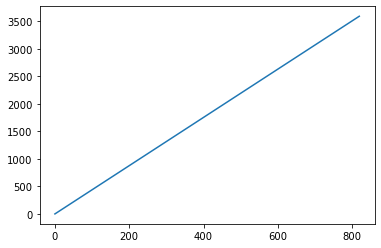

In [65]:
plt.plot(phase)
plt.plot(np.wrap(phase))
# phase, np.unwrap(phase)

In [14]:
data['theta_x_array'],data['theta_y_array']

KeyError: 'theta_y_array'

### Fast Axis


In [117]:
valid_idx = np.invert(np.isnan(stat_mean))
valid_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

((400,), (1334,), (401,))

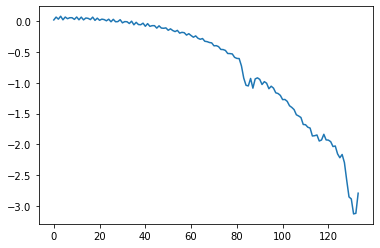

In [102]:
from scipy import stats

voltage_resolution = 1
voltage_range = 400

voltage_bins = np.arange(-voltage_resolution/2,voltage_range,voltage_resolution)
voltages = np.arange(0, voltage_range, voltage_resolution)
mean_stat = stats.binned_statistic(voltage, theta_x_array, 'mean', bins=voltage_bins)

mean_stat.statistic, mean_stat.bin_edges, mean_stat.binnumber

theta_x = np.mean(mean_stat.statistic, 0)

plt.plot(voltages, theta_x)

theta_x.shape, voltage.shape,bins.shape
# theta_x

array([0., 0., 0., ..., 0., 0., 0.])

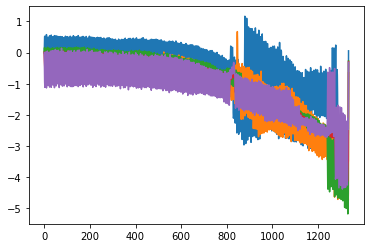

In [45]:
plt.plot(theta_x_array.T)

In [19]:
data['metric_flag']

array([ True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True])

In [17]:
m = data['metric']
m<np.percentile(m,75)

array([ True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True])

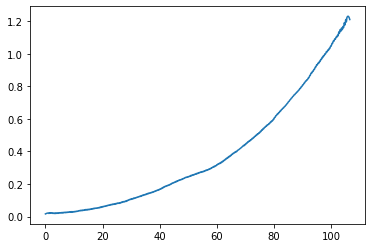

In [91]:
tx = np.array(data['theta_x'])

plt.plot(voltage1, np.mean(tx,0))

[nan,
 nan,
 nan,
 nan,
 1.5533057093827023e-07,
 1.8974777890969663e-06,
 1.9553751110004993e-06,
 4.2832249210031925e-07,
 3.27916689155352e-07,
 1.870107891702217e-06,
 1.9314243664121115e-06,
 4.150839224876709e-07,
 7.514376037148604e-07,
 2.146473801774974e-06,
 1.6266005343621594e-06,
 1.6102677737485196e-07,
 7.612372637972788e-07,
 2.1818477694293415e-06,
 1.473805815747354e-06,
 2.77711099762541e-07,
 1.027334109059845e-06,
 2.1310770011688045e-06,
 1.1084810116649144e-06,
 1.3328967096709793e-07,
 9.769113360849328e-07,
 2.3215985057512216e-06,
 1.5895293743588087e-06,
 5.6127557284680884e-08,
 8.101554732682158e-07,
 2.1817135186982727e-06,
 1.6043181487897574e-06,
 2.755575088584488e-07,
 1.0751093836374642e-06,
 2.1165485994332093e-06,
 1.1760279187710821e-06,
 6.393054620779623e-08,
 9.533432087565242e-07,
 2.354495598096969e-06,
 1.3279483587995098e-06,
 2.0122438044674416e-07,
 9.956704105607471e-07,
 2.0991618498685376e-06,
 1.108908656704785e-06,
 2.48071103821491e-0

[nan,
 nan,
 nan,
 nan,
 1.5533057093827023e-07,
 1.8974777890969663e-06,
 1.9553751110004993e-06,
 4.2832249210031925e-07,
 3.27916689155352e-07,
 1.870107891702217e-06,
 1.9314243664121115e-06,
 4.150839224876709e-07,
 7.514376037148604e-07,
 2.146473801774974e-06,
 1.6266005343621594e-06,
 1.6102677737485196e-07,
 7.612372637972788e-07,
 2.1818477694293415e-06,
 1.473805815747354e-06,
 2.77711099762541e-07,
 1.027334109059845e-06,
 2.1310770011688045e-06,
 1.1084810116649144e-06,
 1.3328967096709793e-07,
 9.769113360849328e-07,
 2.3215985057512216e-06,
 1.5895293743588087e-06,
 5.6127557284680884e-08,
 8.101554732682158e-07,
 2.1817135186982727e-06,
 1.6043181487897574e-06,
 2.755575088584488e-07,
 1.0751093836374642e-06,
 2.1165485994332093e-06,
 1.1760279187710821e-06,
 6.393054620779623e-08,
 9.533432087565242e-07,
 2.354495598096969e-06,
 1.3279483587995098e-06,
 2.0122438044674416e-07,
 9.956704105607471e-07,
 2.0991618498685376e-06,
 1.108908656704785e-06,
 2.48071103821491e-0

[nan,
 nan,
 nan,
 nan,
 1.5533057093827023e-07,
 1.8974777890969663e-06,
 1.9553751110004993e-06,
 4.2832249210031925e-07,
 3.27916689155352e-07,
 1.870107891702217e-06,
 1.9314243664121115e-06,
 4.150839224876709e-07,
 7.514376037148604e-07,
 2.146473801774974e-06,
 1.6266005343621594e-06,
 1.6102677737485196e-07,
 7.612372637972788e-07,
 2.1818477694293415e-06,
 1.473805815747354e-06,
 2.77711099762541e-07,
 1.027334109059845e-06,
 2.1310770011688045e-06,
 1.1084810116649144e-06,
 1.3328967096709793e-07,
 9.769113360849328e-07,
 2.3215985057512216e-06,
 1.5895293743588087e-06,
 5.6127557284680884e-08,
 8.101554732682158e-07,
 2.1817135186982727e-06,
 1.6043181487897574e-06,
 2.755575088584488e-07,
 1.0751093836374642e-06,
 2.1165485994332093e-06,
 1.1760279187710821e-06,
 6.393054620779623e-08,
 9.533432087565242e-07,
 2.354495598096969e-06,
 1.3279483587995098e-06,
 2.0122438044674416e-07,
 9.956704105607471e-07,
 2.0991618498685376e-06,
 1.108908656704785e-06,
 2.48071103821491e-0

In [43]:
np.argmin(data['metric'][7:])

2

In [68]:
np.arctan(0)

0.0